# Baseline Sklearn-based models

> Start with the simplest models and iteratively improve it

- bibliography: ../references.bib
- title-block-banner: true

This notebook's purpose is to show how to use the sklearn-like models pipeline for text classification.

The pipeline trains a selected classifier on a selected dataset, training a specified vectorizer previously. Then, it computes the text classification evaluation metrics and saves them in a JSON file in a specified path.

Apart from the "SklearnClassificationPipeline" class, all you need to import is a selected sklearn-like classifier and any sklearn vectorizer, like CountVectorizer or TfidfVectorizer.

# Imports

In [1]:
# | eval: false
!pip install xgboost

In [2]:
# | eval: false
import warnings

warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

from embeddings.pipeline.sklearn_classification import SklearnClassificationPipeline

# What dataset do we want to use in the experiment?

In [3]:
# | eval: false
DATASET_NAME = "clarin-pl/polemo2-official"

# Prepare three baseline models

Variables you need to pass to the SklearnClassificationPipeline class:
- __dataset kwargs__: name of the dataset and names of X and Y columns, respectively. You can pass them to the class from a dict, like in all examples below, or directly.
- __output_path__: a path where you want a file with evaluation metrics saved.

The remaining elements are optional. Note that arguments __"embeddings_kwargs"__ and __"classifier_kwargs"__ are passed to the class __without "**"__.
In this notebook we are using the POLEMO2 dataset - the details about it can be found [here](https://huggingface.co/datasets/clarin-pl/polemo2-official).

We will use sklearn-based vectorizer; hence we can customize 

## AdaBoost model

In [4]:
# | eval: false
embeddings_kwargs = {"max_features": 10000, "max_df": 10}

classifier_kwargs = {"n_estimators": 100}

In [5]:
# | eval: false
evaluation_filename = "adaboost_tfidf_evaluation.json"  # default name: evaluation_filename.json
output_path = "."

adaboost_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name_or_path=DATASET_NAME,
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=AdaBoostClassifier,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename,
    classifier_kwargs=classifier_kwargs,
    embedding_kwargs=embeddings_kwargs,
)

In [6]:
# | eval: false
adaboost_tfidf_result = adaboost_tfidf_pipeline.run()

No config specified, defaulting to: polemo2-official/all_text
Found cached dataset polemo2-official (/root/.cache/huggingface/datasets/clarin-pl___polemo2-official/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)
100%|██████████| 3/3 [00:00<00:00, 746.58it/s]


In [7]:
# | eval: false
adaboost_tfidf_result

TextClassificationEvaluationResults(accuracy=0.4695121951219512, f1_macro=0.2911453518233179, f1_micro=0.4695121951219512, f1_weighted=0.33223355506282337, recall_macro=0.3516011699415029, recall_micro=0.4695121951219512, recall_weighted=0.4695121951219512, precision_macro=0.3180081961736342, precision_micro=0.4695121951219512, precision_weighted=0.3020448062562097, classes={0: {'precision': 0.8305084745762712, 'recall': 0.4152542372881356, 'f1': 0.5536723163841808, 'support': 118}, 1: {'precision': 0.44152431011826543, 'recall': 0.9911504424778761, 'f1': 0.610909090909091, 'support': 339}, 2: {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'support': 227}, 3: {'precision': 0.0, 'recall': 0.0, 'f1': 0.0, 'support': 136}}, data=Predictions(y_pred=array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 

## Old good SVM

In [8]:
# | eval: false
svm_kwargs = {"kernel": "linear", "C": 0.6}

evaluation_filename_svm_tdidf = "svm_tfidf_evaluation.json"

svm_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name_or_path=DATASET_NAME,
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=SVC,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename_svm_tdidf,
    classifier_kwargs=svm_kwargs,
    embedding_kwargs=embeddings_kwargs,
)

In [9]:
# | eval: false
svm_tfidf_result = svm_tfidf_pipeline.run()

No config specified, defaulting to: polemo2-official/all_text
Found cached dataset polemo2-official (/root/.cache/huggingface/datasets/clarin-pl___polemo2-official/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)
100%|██████████| 3/3 [00:00<00:00, 904.07it/s]


## Kaggle-winner XGBoost

In [10]:
# | eval: false
embeddings_kwargs = {"max_features": 10000}

xgb_kwargs = {"n_estimators": 200, "max_depth": 7}

evaluation_filename_xgb_tdidf = "xgb_tfidf_evaluation.json"

xgb_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name_or_path=DATASET_NAME,
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=XGBClassifier,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename_xgb_tdidf,
    classifier_kwargs=xgb_kwargs,
    embedding_kwargs=embeddings_kwargs,
)

In [11]:
# | eval: false
xgb_tfidf_result = xgb_tfidf_pipeline.run()

No config specified, defaulting to: polemo2-official/all_text
Found cached dataset polemo2-official (/root/.cache/huggingface/datasets/clarin-pl___polemo2-official/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)
100%|██████████| 3/3 [00:00<00:00, 674.94it/s]


# Compare models 

In [12]:
# | eval: false
!pip install seaborn

In [13]:
# | eval: false
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
# | eval: false
methods = ["AdaBoost", "SVM", "XGBoost"]
f1_scores = [adaboost_tfidf_result.f1_macro, svm_tfidf_result.f1_macro, xgb_tfidf_result.f1_macro]
results_df = pd.DataFrame(data={"method": methods, "f1": f1_scores})

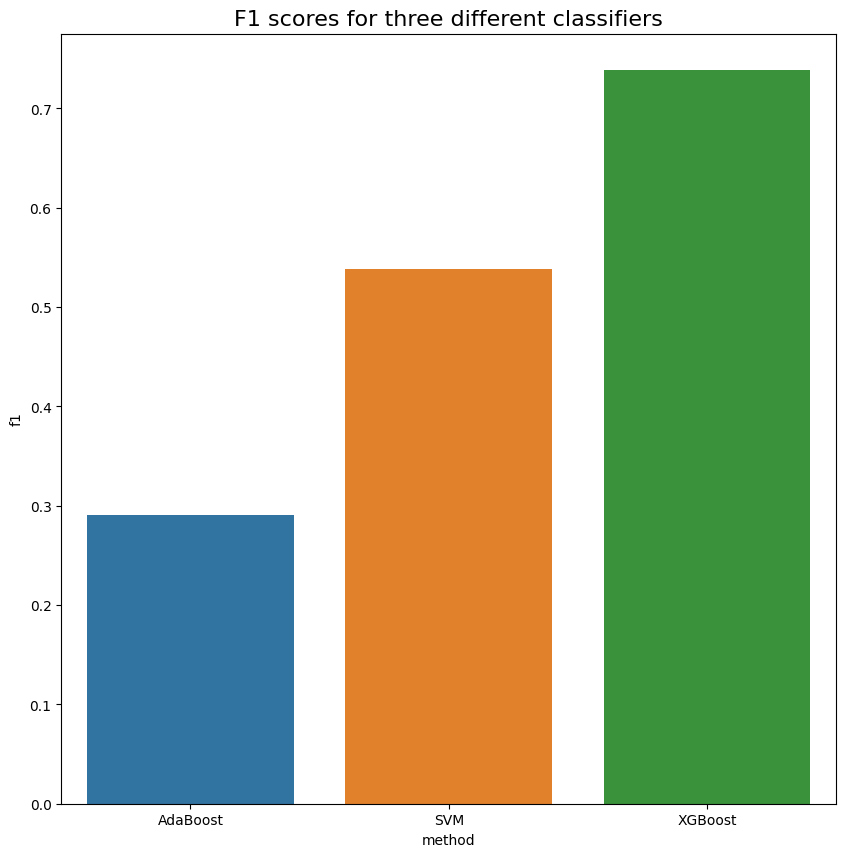

In [15]:
# | eval: false
plt.figure(figsize=(10, 10))
sns.barplot(data=results_df, x="method", y="f1")
plt.title("F1 scores for three different classifiers", fontsize=16)
plt.show()

In this very simple experiment, the XGBoost turned out to be the best. Its way to learn basing on gradients of previous classifiers could be decisive.

It would be great to add these model to the LEPISZCZE benchmark.

# Make a submission to LEPISZCZE benchmark

> We prepared helper methods to generate a submission for you. There are a couple of steps to cover.

Firstly, do we have model's predictions or metrics? Yes, we have, check out `xgb_tfidf_result` object.

In [16]:
# | eval: false
xgb_tfidf_result

TextClassificationEvaluationResults(accuracy=0.7573170731707317, f1_macro=0.7383632851951776, f1_micro=0.7573170731707317, f1_weighted=0.7531105273460682, recall_macro=0.7279708041839421, recall_micro=0.7573170731707317, recall_weighted=0.7573170731707317, precision_macro=0.7527270564328854, precision_micro=0.7573170731707317, precision_weighted=0.7526286151229844, classes={0: {'precision': 0.9722222222222222, 'recall': 0.8898305084745762, 'f1': 0.9292035398230089, 'support': 118}, 1: {'precision': 0.7745358090185677, 'recall': 0.8613569321533924, 'f1': 0.8156424581005588, 'support': 339}, 2: {'precision': 0.746606334841629, 'recall': 0.7268722466960352, 'f1': 0.7366071428571428, 'support': 227}, 3: {'precision': 0.5175438596491229, 'recall': 0.4338235294117647, 'f1': 0.47200000000000003, 'support': 136}}, data=Predictions(y_pred=array([1, 3, 2, 2, 3, 0, 0, 0, 1, 3, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 1, 3,
       0, 1,

Of course, we need a couple imports.

In [17]:
# | eval: false
import datasets
import numpy as np

from embeddings.evaluator.evaluation_results import Predictions
from embeddings.evaluator.leaderboard import get_dataset_task
from embeddings.evaluator.submission import AveragedSubmission
from embeddings.utils.utils import get_installed_packages

It is one of the most important aspect of LEPISZCZE co store all artifacts generated during models design, construction and training, so we gather all hyper parameters. 

In [18]:
# | eval: false
hparams = {**embeddings_kwargs, **xgb_kwargs, "vectorizer": "TfidfVectorizer"}

We also store packages that are used to train model.

In [19]:
# | eval: false
packages = get_installed_packages()
packages[:10]

['absl-py==1.4.0',
 'aiofiles==22.1.0',
 'aiohttp==3.8.4',
 'aiosignal==1.3.1',
 'aiosqlite==0.18.0',
 'alembic==1.9.3',
 'anyio==3.6.2',
 'appdirs==1.4.4',
 'argon2-cffi-bindings==21.2.0',
 'argon2-cffi==21.3.0']

Then, of course we want to get true labels for our dataset. All dataset in LEPISZCZE contains `test` set, so we need only extract it from the dataset.

In [20]:
# | eval: false
TARGET_COLUMN_NAME = "target"
dataset = datasets.load_dataset(DATASET_NAME)
y_true = np.array(dataset["test"][TARGET_COLUMN_NAME])

No config specified, defaulting to: polemo2-official/all_text
Found cached dataset polemo2-official (/root/.cache/huggingface/datasets/clarin-pl___polemo2-official/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)
100%|██████████| 3/3 [00:00<00:00, 835.69it/s]


Then, we need also predictions. It is often important to get predictions from several runs to get variation of results. 

In [21]:
# | eval: false
predictions = [
    Predictions(y_true=y_true, y_pred=preds)
    for preds in [xgb_tfidf_result.data.y_pred, xgb_tfidf_result.data.y_pred]
]

Finally, we have all necessary information and we can generate submission.

In [22]:
# | eval: false
submission = AveragedSubmission.from_predictions(
    submission_name="baseline_xgboost_tfidf",
    dataset_name=DATASET_NAME,
    dataset_version=dataset["train"].info.version.version_str,
    embedding_name="XGBoost+Tfidf",  # it will be your's submission model name
    predictions=predictions,
    hparams=hparams,
    packages=packages,
    task=get_dataset_task(DATASET_NAME),
)

In [23]:
# | eval: false
submission

AveragedSubmission(submission_name='baseline_xgboost_tfidf', dataset_name='clarin-pl/polemo2-official', dataset_version='0.0.0', embedding_name='XGBoost+Tfidf', hparams={'max_features': 10000, 'n_estimators': 200, 'max_depth': 7, 'vectorizer': 'TfidfVectorizer'}, packages=['absl-py==1.4.0', 'aiofiles==22.1.0', 'aiohttp==3.8.4', 'aiosignal==1.3.1', 'aiosqlite==0.18.0', 'alembic==1.9.3', 'anyio==3.6.2', 'appdirs==1.4.4', 'argon2-cffi-bindings==21.2.0', 'argon2-cffi==21.3.0', 'arrow==1.2.3', 'asttokens==2.2.1', 'astunparse==1.6.3', 'async-timeout==4.0.2', 'attrs==22.2.0', 'babel==2.11.0', 'backcall==0.2.0', 'beautifulsoup4==4.11.2', 'black==21.12b0', 'bleach==6.0.0', 'cachetools==5.3.0', 'catalogue==2.0.8', 'certifi==2022.12.7', 'cffi==1.15.1', 'charset-normalizer==3.0.1', 'click==8.0.4', 'cmaes==0.9.1', 'colorlog==6.7.0', 'comm==0.1.2', 'contourpy==1.0.7', 'coverage==6.2', 'cycler==0.11.0', 'datasets==2.9.0', 'debugpy==1.6.6', 'decorator==5.1.1', 'defusedxml==0.7.1', 'dill==0.3.6', 'dock

Then, just save the submission to json file.

In [24]:
# | eval: false
submission.save_json(
    root="../../lepiszcze-submissions/baselines",
    filename="baseline-xgboost-with-tfidf.json",
    compress=False,
)

Then, finish submission by following [instruction](https://lepiszcze.ml/submission/#4-submit-via-pull-request)

In [25]:
# | eval: false
!ls ../../lepiszcze-submissions/baselines

baseline-xgboost-with-tfidf.json  baseline_xgboost_tfidf_predictions.json
